### Load data and import packages

In [1030]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [1205]:
pwd

'C:\\Users\\timon\\Downloads\\Tensorflow+Lektion+Material\\04-ANNs'

In [1031]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [1032]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [1033]:
feat_info('mort_acc')

Number of mortgage accounts.


In [1034]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

In [1035]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

### Investigate the data (EDA)

In [1036]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [1037]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [1038]:
df.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

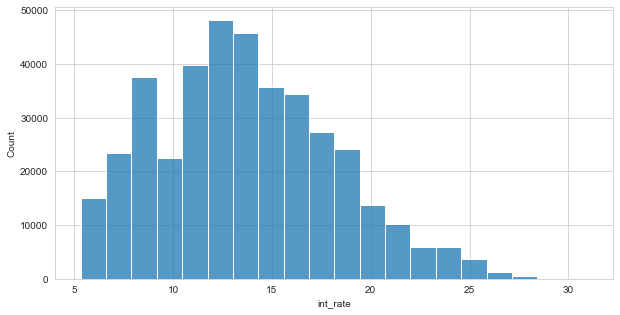

In [1039]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x='int_rate', bins = 20)

In [1040]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

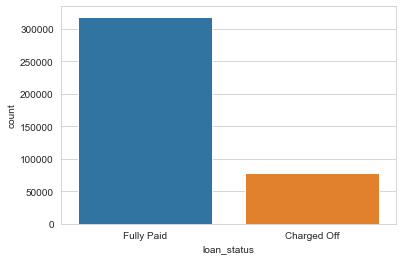

In [1041]:
sns.countplot(data = df, x='loan_status')

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

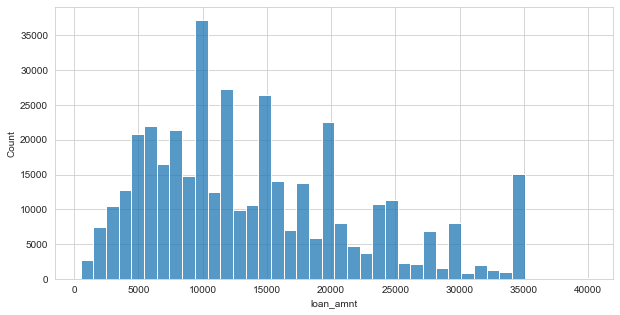

In [1042]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x='loan_amnt', bins = 40)

In [1043]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

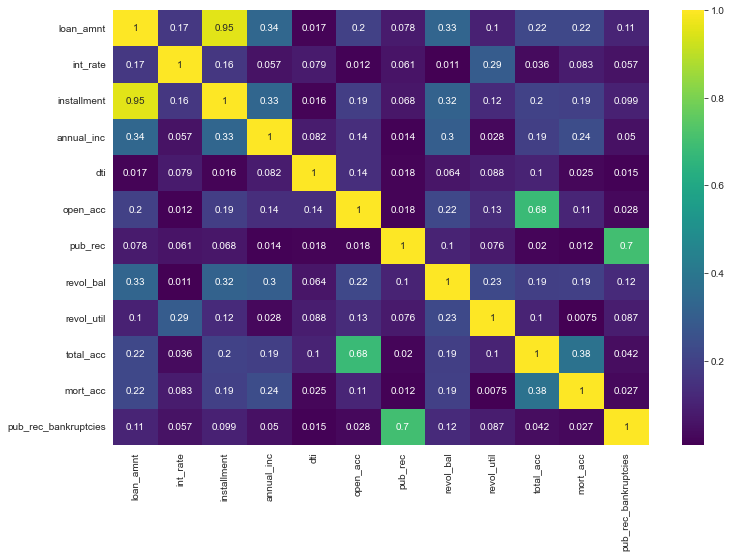

In [1044]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().abs(),cmap='viridis', annot=True)

The monthly payment owed by the borrower if the loan originates.
None
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
None


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

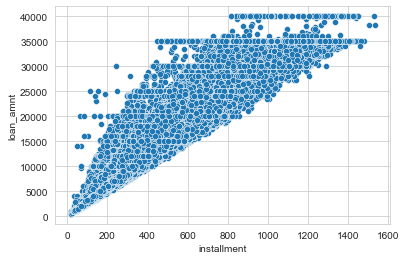

In [1045]:
print(feat_info('installment'))
print(feat_info('loan_amnt'))
sns.scatterplot(data=df,x='installment',y='loan_amnt')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

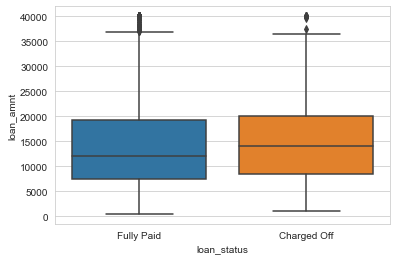

In [1046]:
sns.boxplot(data = df, x='loan_status',y='loan_amnt')

In [1047]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [1048]:
print(df.grade.value_counts())
print(np.sort(df.grade.unique()))
print(np.sort(df.sub_grade.unique()))

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64
['A' 'B' 'C' 'D' 'E' 'F' 'G']
['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']


<AxesSubplot:xlabel='grade', ylabel='count'>

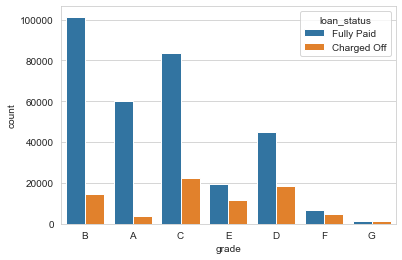

In [1049]:
sns.countplot(data = df, x = 'grade', hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

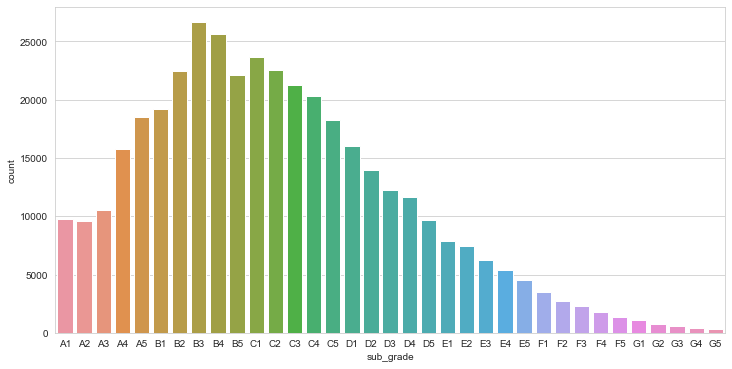

In [1050]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'sub_grade', order=np.sort(df.sub_grade.unique()))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

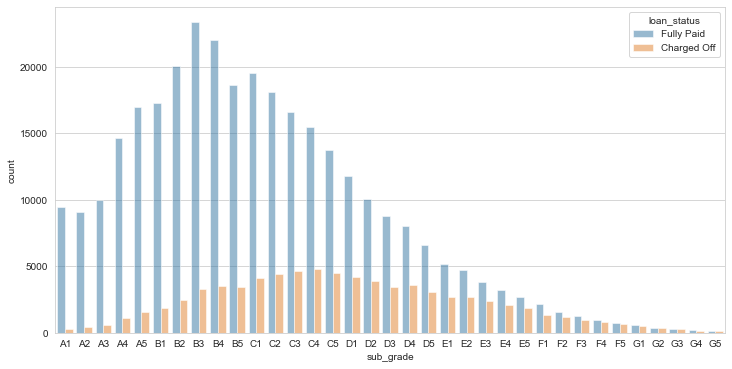

In [1051]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'sub_grade', order=np.sort(df.sub_grade.unique()), hue= 'loan_status', alpha=0.5)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

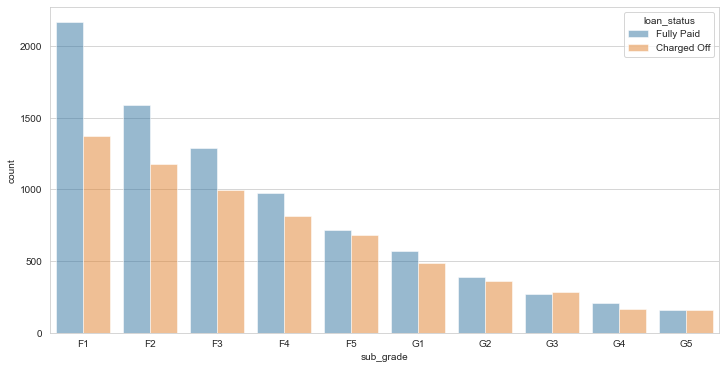

In [1052]:
plt.figure(figsize=(12,6))
sns.countplot(data = df[((df['sub_grade'].str.contains("F"))|df['sub_grade'].str.contains("G"))], 
              x = 'sub_grade', 
              order=np.sort(df[((df['sub_grade'].str.contains("F"))|df['sub_grade'].str.contains("G"))].sub_grade.unique()), 
              hue= 'loan_status', alpha=0.5)

In [1053]:
df["loan_repaid"] = df["loan_status"].map({"Fully Paid":1, "Charged Off":0})

<AxesSubplot:>

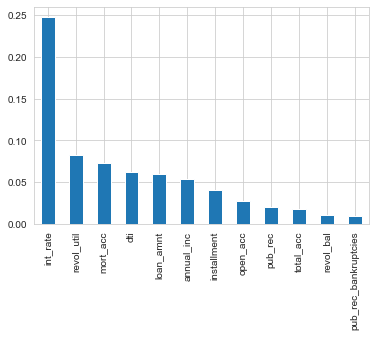

In [1054]:
df.corr()["loan_repaid"].abs()[:-1].sort_values(ascending = False).plot(kind='bar')

In [1055]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [1056]:
df.shape

(396030, 28)

### Cleaning the data

In [1057]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [1058]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dti                     0.000000
address                 0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
loan_amnt               0.000000
term                    0.000000
purpose                 0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
loan_repaid             0.000000
dtype: float64

In [1059]:
print(feat_info('emp_title'))
print('\n')
print(feat_info('emp_length'))

The job title supplied by the Borrower when applying for the loan.*
None


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


In [1060]:
len(df.emp_title.unique())

173106

In [1061]:
df.emp_title.value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [1062]:
df.drop("emp_title", axis=1, inplace=True)

In [1063]:
sorted(df.emp_length.dropna().unique())

#['< 1 year', '1 year','2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years','10+ years']

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

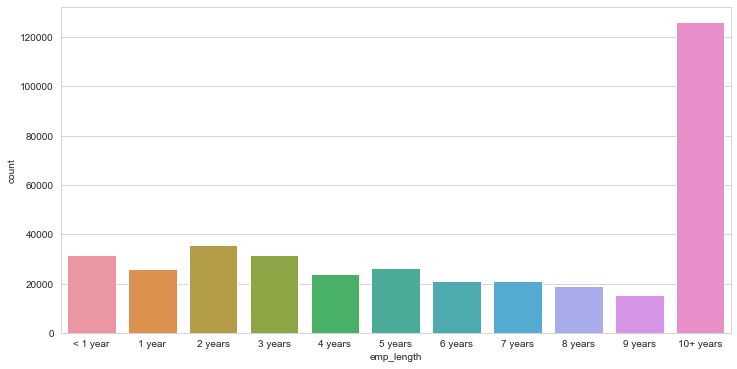

In [1064]:
#df.emp_length.value_counts().plot(kind='bar')
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'emp_length', 
              order = ['< 1 year', '1 year','2 years', '3 years', '4 years', '5 years',
                       '6 years', '7 years', '8 years', '9 years','10+ years'])

<AxesSubplot:xlabel='emp_length', ylabel='count'>

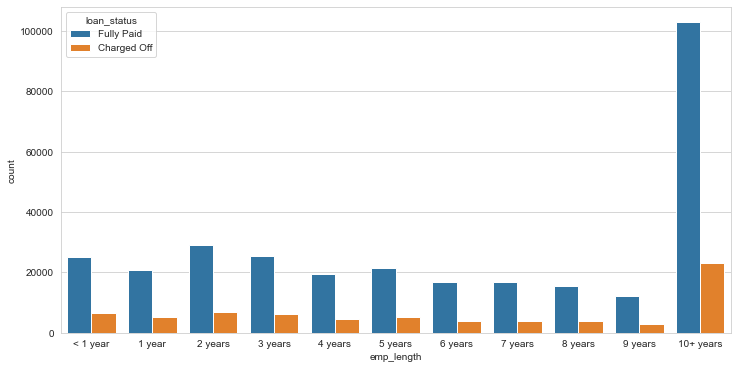

In [1065]:
#df.emp_length.value_counts().plot(kind='bar')
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'emp_length',
              order = ['< 1 year', '1 year','2 years', '3 years', '4 years', 
                       '5 years', '6 years', '7 years', '8 years', '9 years','10+ years'],
             hue='loan_status')

<AxesSubplot:xlabel='emp_length'>

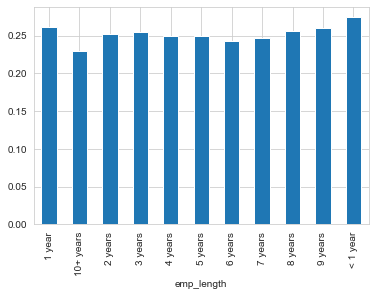

In [1066]:
no_pay = df[df['loan_repaid']==0].dropna().groupby("emp_length")["emp_length"].count()
pay = df[df['loan_repaid']==1].dropna().groupby("emp_length")["emp_length"].count()

pay_ratio = no_pay / pay
pay_ratio.plot(kind='bar')

In [1067]:
df.drop("emp_length", axis = 1, inplace= True)

In [1068]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [1069]:
df[["title", "purpose"]]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


In [1070]:
df.drop("title", axis=1, inplace=True)

In [1071]:
df[["mort_acc","revol_util","pub_rec_bankruptcies"]].head(50)

,mort_acc,revol_util,pub_rec_bankruptcies
0,0.0,41.8,0.0
1,3.0,53.3,0.0
2,0.0,92.2,0.0
3,0.0,21.5,0.0
4,1.0,69.8,0.0
5,4.0,100.6,0.0
6,3.0,4.9,0.0
7,0.0,64.5,0.0
8,3.0,32.9,0.0
9,1.0,82.4,0.0


In [1072]:
df.mort_acc.value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [1073]:
df.corr()["mort_acc"].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [1074]:
df.groupby("total_acc")["mort_acc"].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [1075]:
mean = df.groupby("total_acc")["mort_acc"].mean()

In [1076]:
df.loc[22]["mort_acc"]

nan

In [1077]:
def fill_mort_acc(row):
    if np.isnan(row["mort_acc"]):
        return mean.loc[row["total_acc"]]
    else:
        return row["mort_acc"]

In [1078]:
df["mort_acc"] = df.apply(lambda x: fill_mort_acc(x), axis = 1)

In [1079]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [1080]:
df.dropna(inplace=True)

In [1081]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Create Dummies for category values

In [1082]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [1083]:
df.term.value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [1084]:
df["term"] = df["term"].map({" 36 months":36, " 60 months":60})

In [1085]:
df.drop("grade", axis = 1, inplace=True)

In [1086]:
df.head(1)

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1


In [1087]:
codes = pd.get_dummies(df["sub_grade"], drop_first=True)

df = pd.concat([df.drop("sub_grade",axis=1),
              pd.DataFrame(codes,columns=codes.columns).astype(int)], axis=1)

In [1088]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [1104]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [1090]:
codes2 = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']], drop_first=True)

df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),
              pd.DataFrame(codes2,columns=codes2.columns).astype(int)], axis=1)

In [1091]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [1092]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [1093]:
df["home_ownership"] = df["home_ownership"].replace(["NONE", "ANY"], 'OTHER')

In [1094]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [1097]:
codes3 = pd.get_dummies(df["home_ownership"])

df = pd.concat([df.drop("home_ownership",axis=1),
              pd.DataFrame(codes3,columns=codes3.columns).astype(int)], axis=1)

In [1098]:
df["address"] = df["address"].apply(lambda x: x[-5:])

In [1099]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'MOR

In [1100]:
codes4 = pd.get_dummies(df["address"])

df = pd.concat([df.drop("address",axis=1),
              pd.DataFrame(codes4,columns=codes4.columns).astype(int)], axis=1)

In [1101]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'MORTGAGE', 'OTHER', '

In [1102]:
df.drop("issue_d", axis=1, inplace=True)

In [1103]:
df.head(1)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,00813,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,Jun-1990,16.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [1108]:
df["earliest_cr_year"]= df.earliest_cr_line.apply(lambda x: x[-4:])
df.drop("earliest_cr_line", axis=1, inplace=True)

In [1112]:
df["earliest_cr_year"] = df["earliest_cr_year"].astype(int)
df.head(1)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,1990


In [1117]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

### Data preprocessing -> Train/Test split

In [1115]:
from sklearn.model_selection import train_test_split

In [1118]:
df.drop("loan_status", axis=1, inplace=True)

In [1119]:
X = df.drop("loan_repaid", axis=1).values
y = df["loan_repaid"].values

In [121]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


In [1120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [1204]:
#import more packages

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import L2

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, auc

In [1122]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1129]:
X_train.shape

(316175, 80)

In [1172]:
#build the model
model = Sequential()

model.add(Dense(units = 80, activation = 'relu', kernel_regularizer=L2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(units = 40, activation = 'relu', kernel_regularizer=L2(0.001)))
model.add(Dropout(0.2))

#model.add(Dense(units = 20, activation = 'relu', kernel_regularizer=L2(0.001)))
#model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [1167]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [1173]:
model.fit(x=X_train, y= y_train, epochs=30, validation_data = (X_test, y_test),batch_size=256, callbacks=[early_stop], verbose=1)

Epoch 1/30
1236/1236 [==============================] - 8s 6ms/step - loss: 0.3314 - accuracy: 0.8800 - val_loss: 0.2864 - val_accuracy: 0.8871
Epoch 2/30
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2823 - accuracy: 0.8879 - val_loss: 0.2784 - val_accuracy: 0.8870
Epoch 3/30
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2771 - accuracy: 0.8881 - val_loss: 0.2768 - val_accuracy: 0.8865
Epoch 4/30
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2751 - accuracy: 0.8881 - val_loss: 0.2753 - val_accuracy: 0.8873
Epoch 5/30
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2735 - accuracy: 0.8881 - val_loss: 0.2731 - val_accuracy: 0.8869
Epoch 6/30
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2721 - accuracy: 0.8881 - val_loss: 0.2717 - val_accuracy: 0.8872
Epoch 7/30
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2714 - accuracy: 0.8882 - val_loss: 0.2712 - val_accuracy:

In [ ]:
#add weihted matrix here  --> idea

#add pruning technic here --> idea

In [1137]:
#save the model

model.save('predict_credit.h5')

<AxesSubplot:>

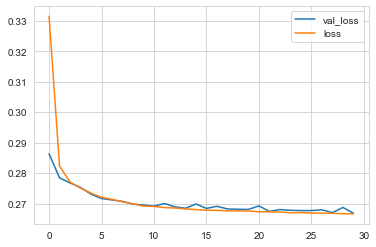

In [1174]:
#model evaluation

losses = pd.DataFrame(model.history.history)

losses[['val_loss', 'loss']].plot()

In [1186]:
predictions = (model.predict(X_test)>0.6).astype("int32")

print(classification_report(y_test, predictions))

'''
Issue with low recall for 0. This is due to an imbalanced data set...
either penalize the false positive or get try to get the data less imbalanced
'''

2471/2471 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.48      0.63     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.89      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



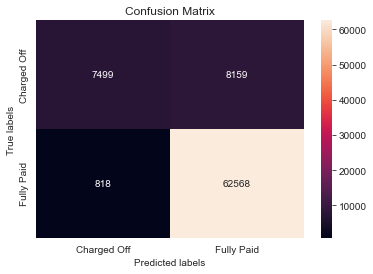

In [1187]:
cm = confusion_matrix(y_test,predictions)

labels = ['Charged Off', 'Fully Paid']

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels);

Logistic: f1=0.933 auc=0.941


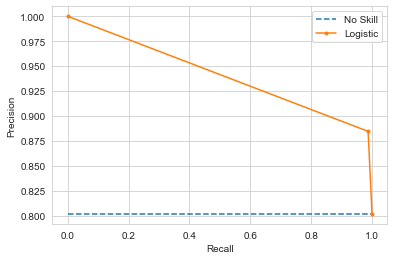

In [1193]:
#just test -> needs work and changing of values and variables...
lr_probs = predictions
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, predictions), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [1152]:
#random test of "new" input value...
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer = scaler.transform(new_customer.values.reshape(1,80))

In [1185]:
(model.predict(new_customer)>0.6).astype("int32")

1/1 [==============================] - 0s 25ms/step


array([[1]])

In [1183]:
df.iloc[random_ind].loan_repaid

1.0

In [1201]:
#import packages for new ML-Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [1195]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=100)

In [1196]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
score = f1_score(y_test, y_pred, average='micro')
print(score)

0.8723369262689136


In [1202]:
#Build function for nice printing of the evaluation data...
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [1203]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 87.34%
_______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      1.000000       0.864036  0.873431       0.932018       0.890640
recall         0.353140       1.000000  0.873431       0.676570       0.873431
f1-score       0.521956       0.927059  0.873431       0.724508       0.847794
support    61865.000000  254310.000000  0.873431  316175.000000  316175.000000
_______________________________________________
Confusion Matrix: 
 [[ 21847  40018]
 [     0 254310]]

Test Result:
Accuracy Score: 87.23%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      1.000000      0.862665  0.872337      0.931332      0.889870
recall         0.355537      1.000000  0.872337      0.677769      0.872337
f1-score       0.524570      0.926269  0.872337      0.725